<a href="https://colab.research.google.com/github/mathababhassan/smart-garbage-classifier/blob/main/AIROST_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 0
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1
dataset_path = "/content/drive/MyDrive/AIROST_PROJECT/garbage_classification"

import os

classes = os.listdir(dataset_path)
classes

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AIROST_PROJECT/garbage_classification'

In [ ]:
# Step 2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/drive/MyDrive/AIROST_PROJECT/garbage_classification"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    subset='training'
)

val = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    subset='validation'
)


Found 11693 images belonging to 12 classes.
Found 2919 images belonging to 12 classes.


In [ ]:
# Step 3A
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Step 3B
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,      # remove the ImageNet classifier
    weights='imagenet'      # load pretrained weights
)

base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# Step 4

# Freeze MobileNetV2 layers
base_model.trainable = False

# Check how many layers are now frozen
len(base_model.trainable_variables)

0

In [ ]:
# Step 5

# Build custom classification head on top of MobileNetV2

x = base_model.output
x = GlobalAveragePooling2D()(x)      # reduce feature maps → vector
x = Dense(128, activation='relu')(x) # learn patterns specific to your dataset
x = Dropout(0.3)(x)                  # prevent overfitting
output = Dense(12, activation='softmax')(x)  # 12 trash classes

model = Model(inputs=base_model.input, outputs=output)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,423,500 (9.24 MB)

 Trainable params: 165,516 (646.55 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Step 6
# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Step 7
# Training the Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=10,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7594 - loss: 0.8182

366/366 ━━━━━━━━━━━━━━━━━━━━ 3014s 8s/step - accuracy: 0.7597 - loss: 0.8173 - val_accuracy: 0.8993 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9310 - loss: 0.2116

366/366 ━━━━━━━━━━━━━━━━━━━━ 264s 721ms/step - accuracy: 0.9310 - loss: 0.2116 - val_accuracy: 0.9120 - val_loss: 0.2791 - learning_rate: 0.0010
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 229s 624ms/step - accuracy: 0.9555 - loss: 0.1451 - val_accuracy: 0.9113 - val_loss: 0.2960 - learning_rate: 0.0010
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9662 - loss: 0.1051

366/366 ━━━━━━━━━━━━━━━━━━━━ 225s 616ms/step - accuracy: 0.9662 - loss: 0.1051 - val_accuracy: 0.9123 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9814 - loss: 0.0638

366/366 ━━━━━━━━━━━━━━━━━━━━ 226s 618ms/step - accuracy: 0.9814 - loss: 0.0638 - val_accuracy: 0.9229 - val_loss: 0.2626 - learning_rate: 2.0000e-04
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9857 - loss: 0.0477

366/366 ━━━━━━━━━━━━━━━━━━━━ 227s 620ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9246 - val_loss: 0.2652 - learning_rate: 2.0000e-04
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9886 - loss: 0.0426

366/366 ━━━━━━━━━━━━━━━━━━━━ 227s 621ms/step - accuracy: 0.9886 - loss: 0.0426 - val_accuracy: 0.9274 - val_loss: 0.2720 - learning_rate: 2.0000e-04
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 225s 616ms/step - accuracy: 0.9915 - loss: 0.0347 - val_accuracy: 0.9274 - val_loss: 0.2657 - learning_rate: 4.0000e-05


In [ ]:
# Step 8A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_data_path = "/content/dataset_split/val"   # physical split we created

val_datagen = ImageDataGenerator(rescale=1./255)

val = val_datagen.flow_from_directory(
    val_data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("Class indices:", val.class_indices)


Found 2925 images belonging to 12 classes.
Class indices: {'battery': 0, 'biological': 1, 'brown-glass': 2, 'cardboard': 3, 'clothes': 4, 'green-glass': 5, 'metal': 6, 'paper': 7, 'plastic': 8, 'shoes': 9, 'trash': 10, 'white-glass': 11}


In [ ]:
# Step 8B
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

val_loss, val_acc = model.evaluate(val)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.9873 - loss: 0.0439
Validation Accuracy: 0.9842734932899475
Validation Loss: 0.0605955570936203


92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step
Unique true class indices: [ 0  1  2  3  4  5  6  7  8  9 10]
Filtered labels (no white-glass): ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


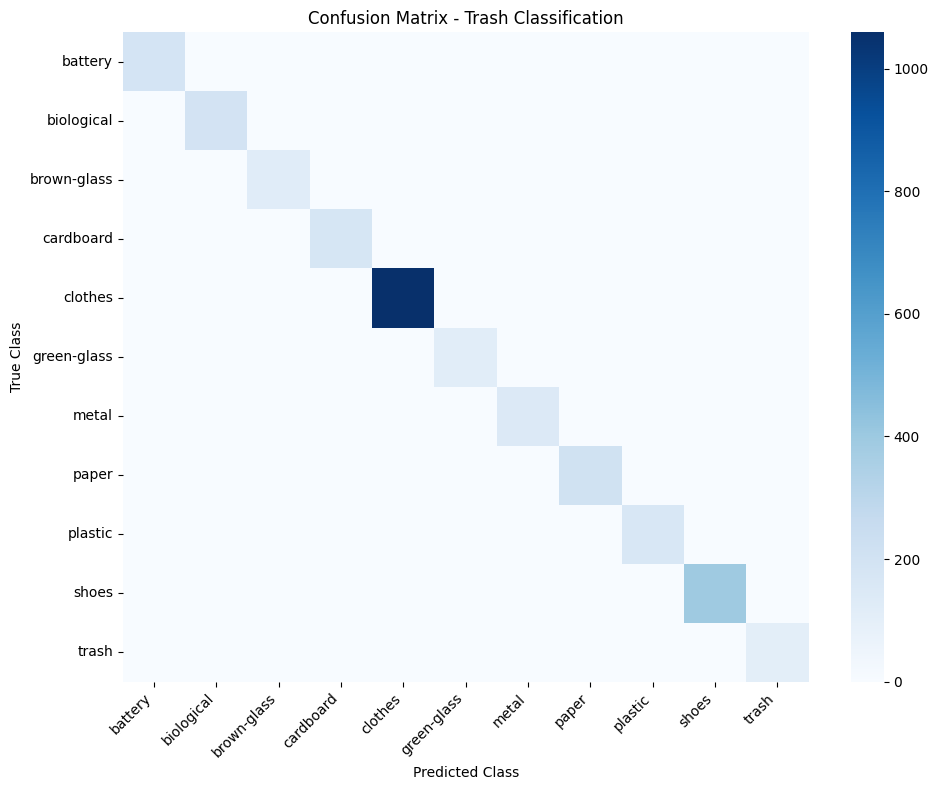

Classification report (only classes present in y_true):

              precision    recall  f1-score   support

     battery       0.98      0.99      0.99       189
  biological       0.97      0.99      0.98       197
 brown-glass       0.97      0.99      0.98       122
   cardboard       0.97      0.97      0.97       179
     clothes       1.00      0.99      1.00      1065
 green-glass       1.00      0.92      0.96       126
       metal       0.97      0.95      0.96       154
       paper       0.96      0.99      0.97       210
     plastic       0.98      0.98      0.98       173
       shoes       0.99      1.00      0.99       396
       trash       0.96      0.96      0.96       114

    accuracy                           0.98      2925
   macro avg       0.98      0.98      0.98      2925
weighted avg       0.98      0.98      0.98      2925



In [ ]:
# Step 8C – Confusion matrix + classification report

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Predictions for all validation images
y_prob = model.predict(val)
y_pred = np.argmax(y_prob, axis=1)   # predicted class index
y_true = val.classes                 # true class index from generator

# 2) Work out which class indices actually appear in y_true
unique_true_indices = np.unique(y_true)

# Map index -> class name using the generator's class_indices
idx_to_class_name = {v: k for k, v in val.class_indices.items()}
filtered_labels   = [idx_to_class_name[idx] for idx in unique_true_indices]

print("Unique true class indices:", unique_true_indices)
print("Filtered labels (no white-glass):", filtered_labels)

# 3) Confusion matrix (only for the classes that actually appear)
cm = confusion_matrix(y_true, y_pred, labels=unique_true_indices)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Trash Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks(
    ticks=np.arange(len(filtered_labels)) + 0.5,
    labels=filtered_labels,
    rotation=45,
    ha='right'
)
plt.yticks(
    ticks=np.arange(len(filtered_labels)) + 0.5,
    labels=filtered_labels,
    rotation=0
)
plt.tight_layout()
plt.show()

# 4) Text report (precision/recall/F1 per class)
print("Classification report (only classes present in y_true):\n")
print(
    classification_report(
        y_true,
        y_pred,
        labels=unique_true_indices,
        target_names=filtered_labels
    )
)


In [ ]:
# Step 9B

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# 1) Clear current model from memory
del model
tf.keras.backend.clear_session()

# 2) Reload from Drive
model_path = "/content/drive/MyDrive/AIROST_PROJECT/best_model.h5"
model = load_model(model_path)

# 3) Compile (needed for evaluate / predict; does NOT change weights)
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Re-evaluate on the same validation generator
val_loss, val_acc = model.evaluate(val)
print("Reloaded model - Validation Accuracy:", val_acc)
print("Reloaded model - Validation Loss:", val_loss)


92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - accuracy: 0.9873 - loss: 0.0439
Reloaded model - Validation Accuracy: 0.9842734932899475
Reloaded model - Validation Loss: 0.0605955570936203


In [ ]:
# Step 9C

import json

# This comes from your validation generator
class_indices = val.class_indices   # {'battery':0, 'biological':1, ...}

mapping_path = "/content/drive/MyDrive/AIROST_PROJECT/class_indices.json"
with open(mapping_path, "w") as f:
    json.dump(class_indices, f, indent=4)

print("Saved class index mapping to:", mapping_path)
print(class_indices)


Saved class index mapping to: /content/drive/MyDrive/AIROST_PROJECT/class_indices.json
{'battery': 0, 'biological': 1, 'brown-glass': 2, 'cardboard': 3, 'clothes': 4, 'green-glass': 5, 'metal': 6, 'paper': 7, 'plastic': 8, 'shoes': 9, 'trash': 10, 'white-glass': 11}


In [ ]:
# Step 10A

import numpy as np
from tensorflow.keras.preprocessing import image

# Load mapping back (simulating tomorrow)
import json
with open("/content/drive/MyDrive/AIROST_PROJECT/class_indices.json") as f:
    class_indices = json.load(f)

idx_to_class = {v: k for k, v in class_indices.items()}

def load_and_preprocess(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)          # shape (128,128,3)
    x = x / 255.0                        # rescale like train/val
    x = np.expand_dims(x, axis=0)        # shape (1,128,128,3)
    return x

def predict_image(img_path):
    x = load_and_preprocess(img_path)
    probs = model.predict(x)
    pred_idx = int(np.argmax(probs, axis=1)[0])
    pred_label = idx_to_class[pred_idx]
    confidence = float(np.max(probs))
    print(f"Image: {img_path}")
    print(f"Predicted class : {pred_label}")
    print(f"Confidence      : {confidence:.3f}")
    return pred_label, confidence


In [ ]:
# Step 10B
test_img_path = "/content/dataset_split/val/battery/battery2.jpg"  # add file name from the val dataset
pred_label, conf = predict_image(test_img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image: /content/dataset_split/val/battery/battery2.jpg
Predicted class : battery
Confidence      : 0.996


In [ ]:
from tensorflow.keras.models import load_model

# 1) Define the path to your saved model
model_path = "/content/drive/MyDrive/AIROST_PROJECT/best_model.h5"

# 2) Load it
model = load_model(model_path)

# 3) Check structure
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,423,502 (9.24 MB)

 Trainable params: 165,516 (646.55 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',   # because flow_from_directory uses one-hot labels by default
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/drive/MyDrive/AIROST_PROJECT/garbage_classification"

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    subset='validation',
    shuffle=False
)


Found 2919 images belonging to 12 classes.


In [ ]:
import shutil
shutil.rmtree("/content/dataset_split", ignore_errors=True)
print("Old dataset_split folder (if any) removed.")


import os
import shutil
from sklearn.model_selection import train_test_split

original_dataset = "/content/drive/MyDrive/AIROST_PROJECT/garbage_classification"
output_base = "/content/dataset_split"
train_root = os.path.join(output_base, "train")
val_root   = os.path.join(output_base, "val")

os.makedirs(train_root, exist_ok=True)
os.makedirs(val_root, exist_ok=True)

for class_name in os.listdir(original_dataset):
    class_path = os.path.join(original_dataset, class_name)
    if not os.path.isdir(class_path):
        continue  # skip non-folders

    print(f"Splitting class: {class_name} ...")

    # create class folders in train/ and val/
    train_class_dir = os.path.join(train_root, class_name)
    val_class_dir   = os.path.join(val_root, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # list image files
    images = [
        f for f in os.listdir(class_path)
        if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".webp", ".jfif"))
    ]

    if len(images) == 0:
        print(f"  ⚠ Skipping {class_name}: no image files found.")
        continue

    if len(images) == 1:
        # edge case: only one file → send it all to train
        img = images[0]
        shutil.copy2(os.path.join(class_path, img),
                     os.path.join(train_class_dir, img))
        print("  → Only 1 image: 1 train, 0 val")
        continue

    # 80/20 split
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # copy train images
    for img in train_imgs:
        shutil.copy2(os.path.join(class_path, img),
                     os.path.join(train_class_dir, img))

    # copy val images
    for img in val_imgs:
        shutil.copy2(os.path.join(class_path, img),
                     os.path.join(val_class_dir, img))

    print(f"  → {len(train_imgs)} train, {len(val_imgs)} val")

print("Finished splitting all classes!")


Old dataset_split folder (if any) removed.
Splitting class: brown-glass ...
  → 485 train, 122 val
Splitting class: green-glass ...
  → 503 train, 126 val
Splitting class: biological ...
  → 788 train, 197 val
Splitting class: battery ...
  → 756 train, 189 val
Splitting class: cardboard ...
  → 712 train, 179 val
Splitting class: clothes ...
  → 4260 train, 1065 val
Splitting class: shoes ...
  → 1581 train, 396 val
Splitting class: paper ...
  → 840 train, 210 val
Splitting class: plastic ...
  → 692 train, 173 val
Splitting class: metal ...
  → 615 train, 154 val
Splitting class: white-glass ...
  ⚠ Skipping white-glass: no image files found.
Splitting class: trash ...
  → 455 train, 114 val
Finished splitting all classes!


In [ ]:
model.save('best_model.h5')

In [ ]:
# for cam interface

import json

# This assumes you still have the 'train' generator from:
# train = train_datagen.flow_from_directory(...)
class_indices = train.class_indices          # {'cardboard': 0, 'glass': 1, ...}
index_to_class = {v: k for k, v in class_indices.items()}   # {0: 'cardboard', 1: 'glass', ...}

with open('class_indices.json', 'w') as f:
    json.dump(index_to_class, f)

print("Saved class_indices.json")
print(index_to_class)


Saved class_indices.json
{0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash', 11: 'white-glass'}


In [ ]:
# now i am downloading best_model.h5 and class_indices.json in my laptop
from google.colab import files

files.download('class_indices.json')
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>